# How well do jobs ans skills pay for DA?
Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for DA
3. Visualize for highest paying skills and most demanded skills

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
#Loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\abc\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US=df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

In [3]:
job_titles=df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]

In [5]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

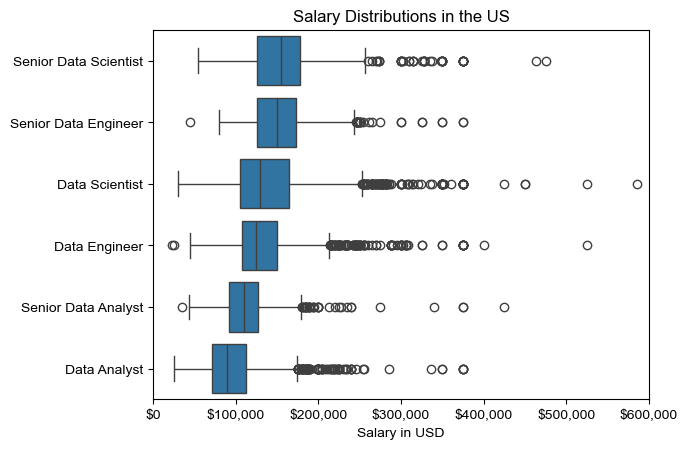

In [6]:
sns.boxplot(data=df_US_top6,y='job_title_short',x='salary_year_avg',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the US')
plt.xlabel('Salary in USD')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

#Investigate Median Salary Vs Skill for DA

In [7]:
df_DA_US=df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [8]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [9]:
df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('median',ascending=False).head(10)

In [10]:
df_DA_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('count',ascending=False).head(10)

In [11]:
df_DA_skills=df_DA_skills.sort_values('median',ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


C:\Users\abc\AppData\Local\Temp\ipykernel_8188\2875258351.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_top_pay,y=df_DA_top_pay.index,x='median',ax=ax[0],palette='dark:b_r')
C:\Users\abc\AppData\Local\Temp\ipykernel_8188\2875258351.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_skills,y=df_DA_skills.index,x='median',ax=ax[1],palette='dark:b_r')


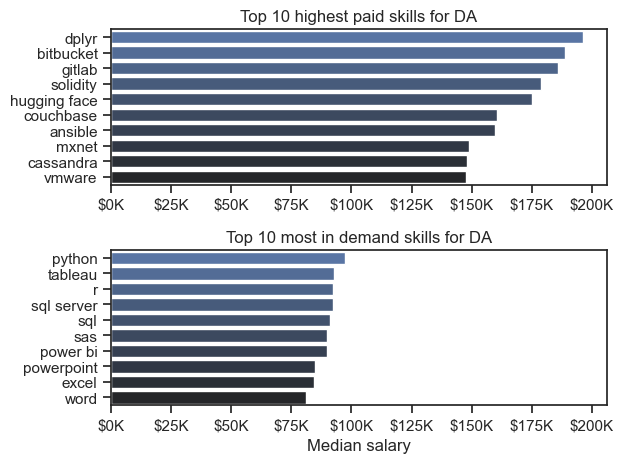

In [13]:
fig, ax = plt.subplots(2,1)

# df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
# ax[0].invert_yaxis()
sns.barplot(data=df_DA_top_pay,y=df_DA_top_pay.index,x='median',ax=ax[0],palette='dark:b_r')
# ax.set_legend(False)

ax[0].set_title('Top 10 highest paid skills for DA')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x  , pos: f'${int(x/1000)}K'))

# df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
sns.barplot(data=df_DA_skills,y=df_DA_skills.index,x='median',ax=ax[1],palette='dark:b_r')
# ax.set_legend(False)
ax[1].set_xlim(ax[0].get_xlim())  
ax[1].set_title('Top 10 most in demand skills for DA')
ax[1].set_xlabel('Median salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x  , pos: f'${int(x/1000)}K'))
fig.tight_layout()